In [103]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Exploratory Data Analysis¶
We will use Pandas and Matplotlib modules in this workbook. Seaborn module also has good visualizations methods. You are welcome to explore on your own.

In [104]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [105]:
fertility= pd.read_csv("fertility.csv")
fertility.head()
fertility.shape

,Year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1960,4.820,6.723308,7.45,6.439002,6.708,6.489,NaN,6.977256,6.929,...,5.615,6.348,7.197,4.979299,7.651,NaN,7.938,6.041,7.115,7.158
1,1961,4.655,6.738651,7.45,6.455523,6.790,6.401,NaN,6.998635,6.910,...,5.651,6.392,7.120,5.003564,7.645,NaN,7.962,6.028,7.169,7.215
2,1962,4.471,6.752818,7.45,6.471399,6.872,6.282,NaN,7.018725,6.892,...,5.679,6.425,7.033,5.025367,7.630,NaN,7.991,6.010,7.214,7.267
3,1963,4.271,6.765400,7.45,6.487246,6.954,6.133,NaN,7.035036,6.875,...,5.696,6.448,6.938,5.045551,7.604,NaN,8.026,5.986,7.249,7.311
4,1964,4.059,6.775406,7.45,6.502619,7.036,5.960,NaN,7.045690,6.857,...,5.698,6.464,6.836,5.056470,7.567,NaN,8.067,5.956,7.274,7.347


(61, 267)

In [106]:
fertility.Year.unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [107]:
fertility.set_index("Year", drop=True, inplace=True)
fertility.head()
fertility.tail()

,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,4.820,6.723308,7.45,6.439002,6.708,6.489,NaN,6.977256,6.929,3.109,...,5.615,6.348,7.197,4.979299,7.651,NaN,7.938,6.041,7.115,7.158
1961,4.655,6.738651,7.45,6.455523,6.790,6.401,NaN,6.998635,6.910,3.100,...,5.651,6.392,7.120,5.003564,7.645,NaN,7.962,6.028,7.169,7.215
1962,4.471,6.752818,7.45,6.471399,6.872,6.282,NaN,7.018725,6.892,3.090,...,5.679,6.425,7.033,5.025367,7.630,NaN,7.991,6.010,7.214,7.267
1963,4.271,6.765400,7.45,6.487246,6.954,6.133,NaN,7.035036,6.875,3.079,...,5.696,6.448,6.938,5.045551,7.604,NaN,8.026,5.986,7.249,7.311
1964,4.059,6.775406,7.45,6.502619,7.036,5.960,NaN,7.045690,6.857,3.068,...,5.698,6.464,6.836,5.056470,7.567,NaN,8.067,5.956,7.274,7.347


,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2016,1.872,4.569675,4.800,5.251674,5.686,1.659,NaN,3.322437,1.491,2.288,...,2.09,2.030,3.859,2.444857,3.976,2.06,3.994,2.457,4.814,3.804
2017,1.886,4.493744,4.633,5.182391,5.600,1.638,NaN,3.276487,1.448,2.275,...,2.08,2.042,3.820,2.427315,3.926,2.02,3.890,2.430,4.718,3.707
2018,1.896,4.420264,4.473,5.113003,5.519,1.617,NaN,3.231001,1.413,2.261,...,2.06,2.049,3.782,2.414952,3.877,2.00,3.792,2.405,4.633,3.615
2019,1.901,4.349436,4.321,5.044144,5.442,1.597,NaN,3.187157,1.387,2.247,...,2.05,2.050,3.744,2.401760,3.830,1.97,3.700,2.381,4.559,3.531
2020,1.901,4.281856,4.176,4.976546,5.371,1.580,NaN,3.145757,1.369,2.233,...,2.03,2.046,3.707,2.387167,3.785,1.95,3.614,2.358,4.496,3.460


Text(0.5, 0, 'Time')

Text(0, 0.5, 'Aruba')

Text(0.5, 1.0, 'Fertility- Aruba')

<AxesSubplot:title={'center':'Fertility- Aruba'}, xlabel='Year', ylabel='Aruba'>

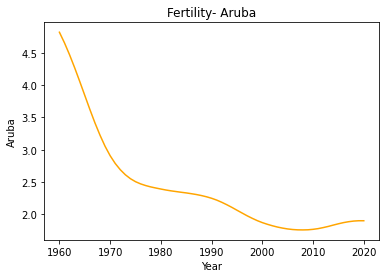

In [108]:
plt.xlabel('Time')
plt.ylabel('Aruba')
plt.title('Fertility- Aruba')
fertility['Aruba'].plot(color ='orange')

Text(0.5, 0, 'Order')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Cases Histogram')

<AxesSubplot:title={'center':'Cases Histogram'}, xlabel='Year', ylabel='Frequency'>

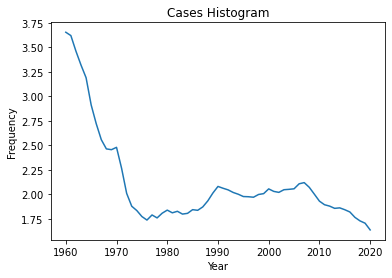

In [109]:
plt.xlabel('Order')
plt.ylabel('Frequency')
plt.title('Cases Histogram')
fertility['United States'].plot()

## Histogram

<AxesSubplot:>

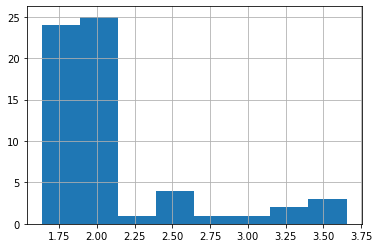

In [110]:
fertility['United States'].hist(bins=8)

In [111]:
fertility['United States'].mean()

2.1134016393442616

<AxesSubplot:>

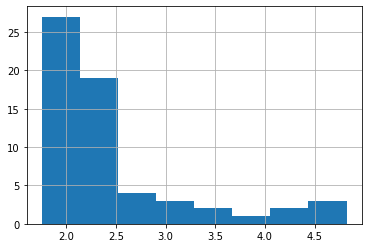

In [112]:
fertility['Aruba'].hist(bins=8)

In [113]:
fertility['Aruba'].mean()

2.420770491803278

## Trend

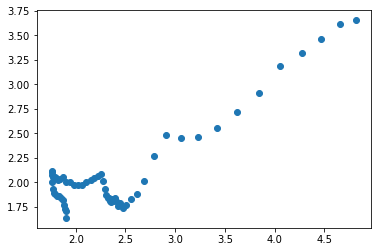

In [116]:
plt.scatter(fertility['Aruba'],fertility['United States'])

### There does not seem to be strong correlation between the fertility of Aruba and the United States over the years.

Text(0.5, 0, 'Aruba')

Text(0, 0.5, 'United States')

Text(0.5, 1.0, 'Comparison between Aruba and United States')

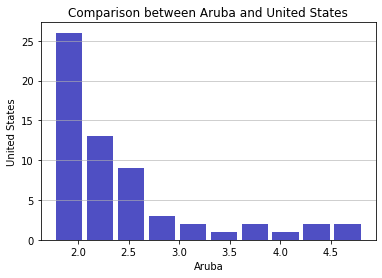

In [119]:
n, bins, patches = plt.hist(x= fertility[['Aruba']], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Aruba')
plt.ylabel('United States')
plt.grid(axis='y', alpha=0.75)

plt.title('Comparison between Aruba and United States')
maxfreq = n.max()

<AxesSubplot:title={'center':'Aruba vs. U.S'}, ylabel='Density'>

<AxesSubplot:title={'center':'Aruba vs. U.S'}, ylabel='Frequency'>

Text(0, 0.5, 'Probability')

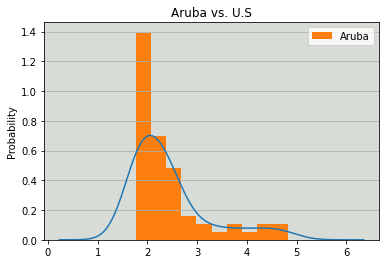

In [120]:
fig, ax = plt.subplots()
fertility[['Aruba']].plot.kde(ax=ax, legend=False, title='Aruba vs. U.S')
fertility[['Aruba']].plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

<AxesSubplot:title={'center':'Histogram: A vs. B'}, ylabel='Density'>

<AxesSubplot:title={'center':'Histogram: A vs. B'}, ylabel='Frequency'>

Text(0, 0.5, 'Probability')

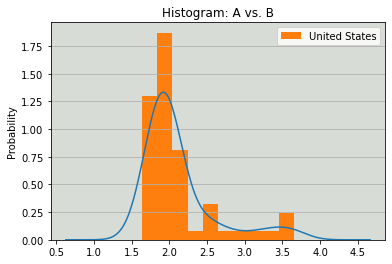

In [122]:
fig, ax = plt.subplots()
fertility[['United States']].plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
fertility[['United States']].plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

### Probability Plot

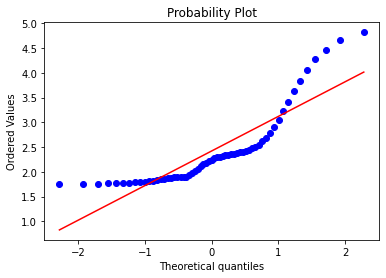

In [124]:
fig = plt.figure()
res = stats.probplot(fertility['Aruba'], plot=plt)

In [126]:
from scipy.stats import anderson

result=(anderson(fertility['United States'], dist='norm'))
print(f"A-D statistic: {result[0]}")
print(f"Critical values: {result[1]}")
print(f"Significance levels: {result[2]}")

A-D statistic: 6.602919444623012
Critical values: [0.544 0.62  0.743 0.867 1.031]
Significance levels: [15.  10.   5.   2.5  1. ]


#### Fail to reject the null hypothesis there is not sufficient evidence to say that it is not normally distributed.

In [127]:
from scipy.stats import shapiro

result = (shapiro(fertility['United States']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

S-W statistic: 0.7091410160064697
p-value: 1.0833629549011903e-09


#### The p value is greater than 0.05, fail to reject not significantly different. 

### Correlation 

In [128]:
fertility[['Aruba','United States']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\josel\AppData\Local\Temp/ipykernel_10284/4160306222.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  fertility[['Aruba','United States']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,Aruba,United States
Aruba,1.00,0.89
United States,0.89,1.00


#### Both have high correlation.